# Keras Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

np.random.seed(1)

## 1. Description: Simple Example - Binary Classification
* We manually set a non-linear boundary which is a standard circle (origin=(0,0), radius=1)
* Each training/test example in X contains two features: x-coordinate and y-coordinate. Therefore, X is a matrix of shape (n, 2)
* Each training/test example in Y contains one label: 0(out of the circle) or 1(in the circle). Therefore, Y is a vector of shape (n,1)

In [2]:
# Create Training set and Test set
n_train = 2000
n_test = 100

X_train = np.random.uniform(-2, 2, size = (n_train, 2))
Y_train = (X_train[:,0]**2 + X_train[:,1]**2 <= 1)
Y_train = Y_train.astype(float)

X_test = np.random.uniform(-2, 2, size = (n_test, 2))
Y_test = (X_test[:,0]**2 + X_test[:,1]**2 <= 1)
Y_test = Y_test.astype(float)

print("* Number of training examples:   " + str(n_train))
print("* First training example in X:   " + str(X_train[0,:]))
print("* First training example in Y:   " + str(Y_train[0]))
print("* Shape of X_train:              " + str(X_train.shape))
print("* Shape of Y_train:              " + str(Y_train.shape))

* Number of training examples:   2000
* First training example in X:   [-0.33191198  0.88129797]
* First training example in Y:   1.0
* Shape of X_train:              (2000, 2)
* Shape of Y_train:              (2000,)


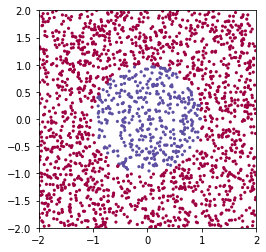

In [3]:
# Visualize the Training Examples
plt.scatter(X_train[:,0], X_train[:,1], s = 10, c = Y_train, lw = 0, cmap = plt.cm.Spectral)
plt.axis('scaled')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

## 2. Steps of Building DNN Architecture in Keras
* Build up the model
* Compile the model
* Fit/Train the model
* Evaluate the model

**Model Specification:** Input -> ReLU -> ReLU -> ReLU -> sigmoid -> Output (4 hidden layers)

In [4]:
# Step 1. Build up the model
def MyModel(input_shape):
    """
    Implementation of the DNN for Binary Classification

    Argument: shape of the input data, excluding the "batch size"

    Return: a Model() instance in Keras
    """
    # Create a placeholder for the input data
    X_input = keras.layers.Input(input_shape, name = "input")

    # DNN Model Specificaton (Input -> ReLU -> ReLU -> ReLU -> sigmoid -> Output)
    X = X_input
    num_nodes = 32

    for i in range(3):
        X = keras.layers.Dense(num_nodes, activation = "relu", name = ("ReLU" + str(i+1)))(X)

    X = keras.layers.Dense(1, activation = "sigmoid", name = "sigmoid")(X)

    # Create the model that can be used for training and testing
    model = keras.models.Model(inputs = X_input, outputs = X, name = "BinaryClassification")

    return model

In [5]:
# Initialize the model and see the summary
mymodel = MyModel(X_train.shape[1:])
mymodel.summary()

Model: "BinaryClassification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
ReLU1 (Dense)                (None, 32)                96        
_________________________________________________________________
ReLU2 (Dense)                (None, 32)                1056      
_________________________________________________________________
ReLU3 (Dense)                (None, 32)                1056      
_________________________________________________________________
sigmoid (Dense)              (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Step 2. Compile the model
# "learning rate decay"
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10,
    decay_rate=0.96,
    staircase=True)

optimizer = keras.optimizers.Adam(learning_rate = lr_schedule)

mymodel.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

Epoch 1/30
32/32 [==============================] - 0s 814us/step - loss: 0.2134 - accuracy: 0.8895
Epoch 2/30
32/32 [==============================] - 0s 676us/step - loss: 0.1209 - accuracy: 0.9555
Epoch 3/30
32/32 [==============================] - 0s 790us/step - loss: 0.0630 - accuracy: 0.9695
Epoch 4/30
32/32 [==============================] - 0s 700us/step - loss: 0.0718 - accuracy: 0.9730
Epoch 5/30
32/32 [==============================] - 0s 665us/step - loss: 0.0481 - accuracy: 0.9785
Epoch 6/30
32/32 [==============================] - 0s 648us/step - loss: 0.0328 - accuracy: 0.9875
Epoch 7/30
32/32 [==============================] - 0s 648us/step - loss: 0.0530 - accuracy: 0.9755
Epoch 8/30
32/32 [==============================] - 0s 649us/step - loss: 0.0416 - accuracy: 0.9850
Epoch 9/30
32/32 [==============================] - 0s 641us/step - loss: 0.0371 - accuracy: 0.9835
Epoch 10/30
32/32 [==============================] - 0s 645us/step - loss: 0.0226 - accuracy: 0.9920

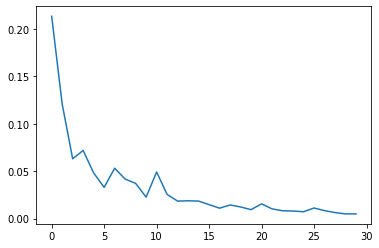

In [7]:
# Step 3. Train the model
fitted_model = mymodel.fit(x = X_train, y = Y_train, epochs = 30, batch_size = 64)

plt.plot(fitted_model.history['loss'])
plt.show()

In [8]:
# Step 4. Evaluate the model
preds = mymodel.evaluate(x = X_test, y = Y_test)
print()
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))


4/4 [==============================] - 0s 709us/step - loss: 0.0045 - accuracy: 1.0000

Loss = 0.004460586700588465
Test Accuracy = 1.0


## 3. Plot the Trained Boundary
* Check whether the model is overfitting
* `plot_decision_doundary()` is a global function defined by ourselves

In [9]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], s=10, c=y, cmap=cmap, lw=0)
    
    return fig, ax

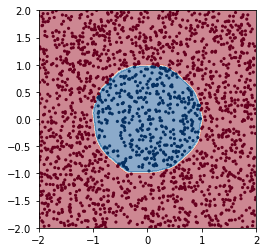

In [10]:
plot_decision_boundary(X_train, Y_train, mymodel, cmap = 'RdBu')
plt.axis('scaled')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()